In [1]:
import numpy as np
import sys
import os
import re
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
stats = {}
for pred in os.listdir('./'):
    if 'retest' in pred:
        print(pred)
        stats[pred]=[]
        with open(pred, 'r') as f:
            lines = f.readlines()
        for i in range(0, len(lines), 3):
            counter = re.sub('[\[\]]','', lines[i].strip()).split()
            counter = [int(c) for c in counter]
            prediction = lines[i+1].strip().split(':')[1]
            ospf = lines[i+2].strip()
            stats[pred].append([counter, prediction, ospf])
    

In [ ]:
for k,i in stats.items():
    predicted_paths = []
    print(k, i[0][2])
    for x in i:
        predicted_paths.append(x[1])
    print(Counter(predicted_paths))
    print()


In [10]:
def get_line(x0, y0, x1, y1):
    x = np.linspace(x0, x1, 100)
    x[0]=0
    m = (y1-y0)/float(x1-x0)
    y = [np.log(m*x_) for x_ in x]
    y[0] = 0
    return x, y

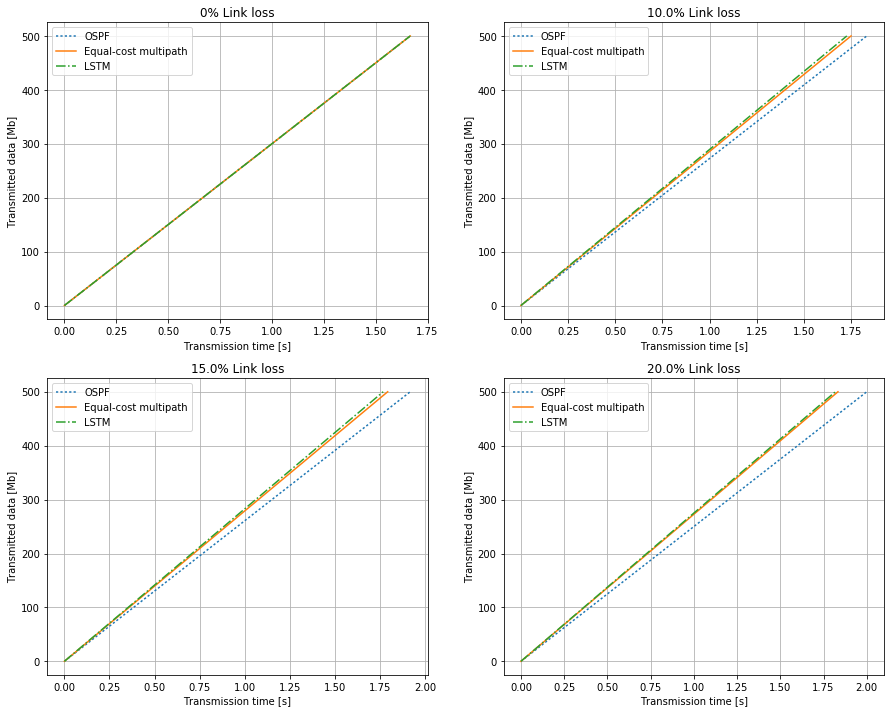

In [36]:
bw = 300.0 #Mbps
traffic = 500.0 #Mb
retransmission = [[0, 0, 0],[0.1, 0.05, 0.0365],[0.15, 0.075, 0.060],[0.2, 0.1, 0.091]]

x = [0, 1.5]
y = [0, traffic]

lines = [':', '-', '-.']
positions = [221, 222, 223, 224]
plt.figure(figsize=(15, 12))

for p,losses in enumerate(retransmission):
    plt.subplot(positions[p])
    plt.title('{:}% Link loss'.format(losses[0]*100))
    plt.ylabel('Transmitted data [Mb]')
    plt.xlabel('Transmission time [s]')
    plt.grid()
    for j,loss in enumerate(losses):
        final_time = traffic/bw * (1+loss)
        x = [0, final_time]
        #x, y = get_line(0,0, final_time, traffic)
        plt.plot(x,y, lines[j])        
    plt.legend(['OSPF', 'Equal-cost multipath', 'LSTM'])
plt.savefig('prediction_cmp_grid.pdf')
plt.show()
